In [1]:
import pandas as pd
dataset=pd.read_csv('datasets/Sleep_health_and_lifestyle_dataset.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [2]:
print(dataset.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [3]:
# Limpieza de datos
# Observamos que la columna 'Sleep Disorder' tiene valores NaN asi que los rellenamos con 'None' como indica el dataset
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].fillna('None')
print(dataset.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75      

In [4]:
# Mostrar estadisticas descriptivas del dataset donde se incluyen conteo, media, desviacion estandar, minimos, maximos y percentiles
# Cabe resaltar que estas estadisticas solo se aplican a las columnas numericas
print(dataset.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [5]:
# Mostrar el numero de valores unicos por columna
number_of_values_per_column=dataset.nunique()
print(number_of_values_per_column)

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


/var/folders/ss/115vlqdj57x0b1mh4sxrw3sh0000gn/T/ipykernel_24294/2038457443.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


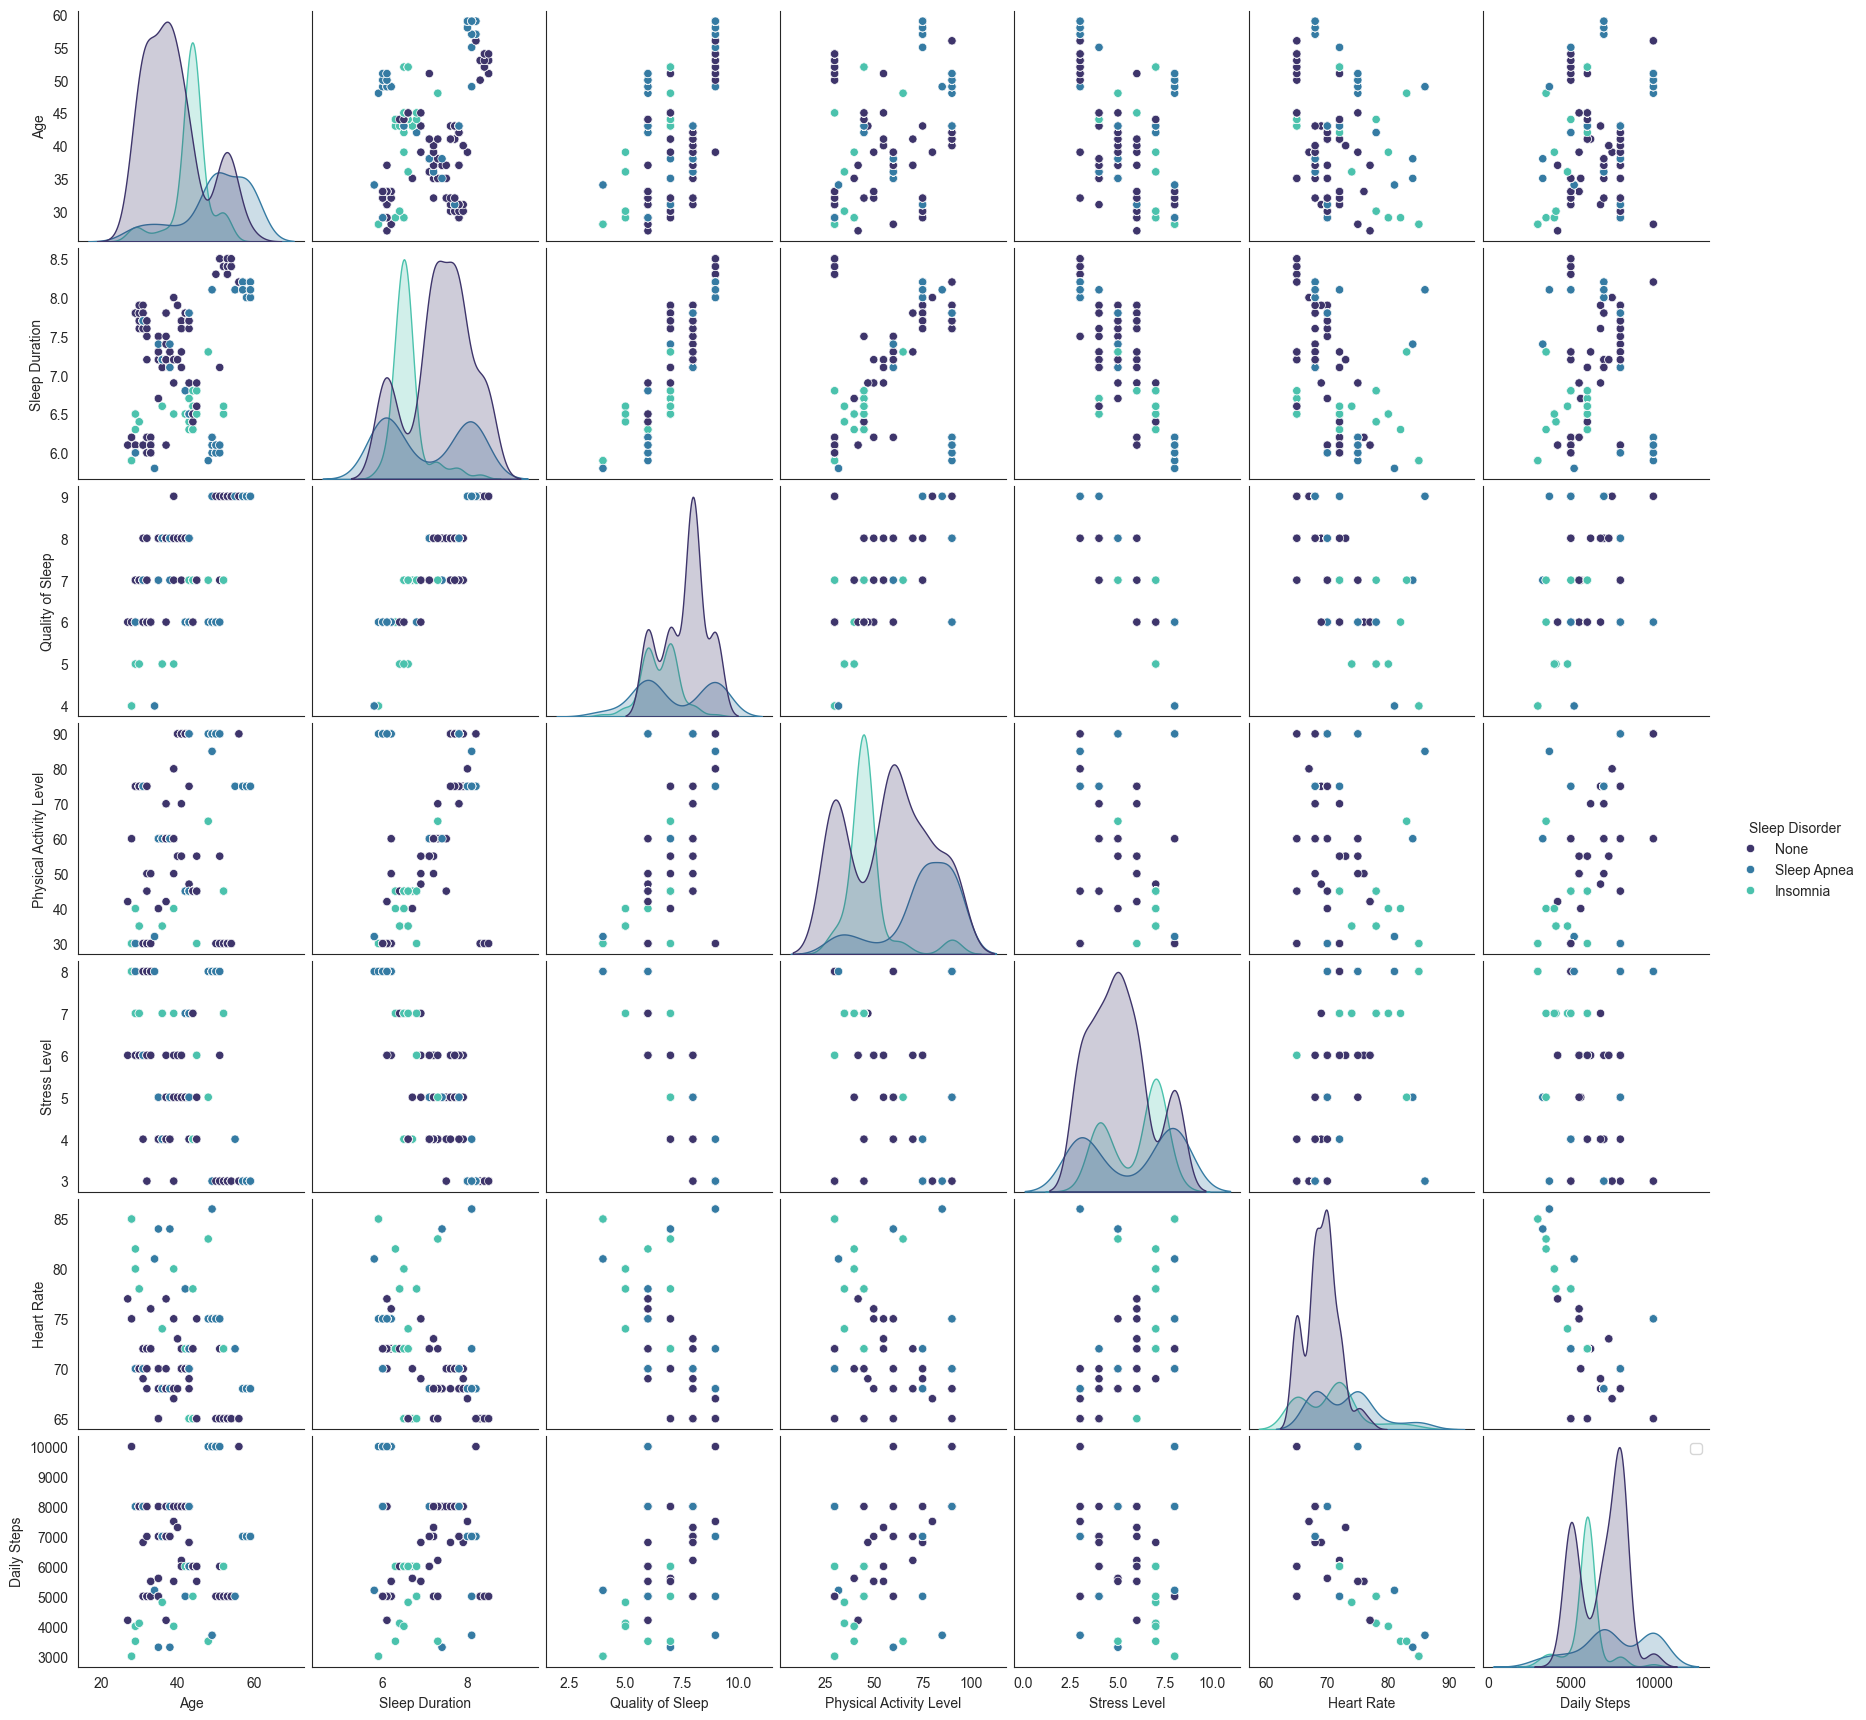

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pintamos el background de blanco para mayor claridad
sns.set_style('white') 
# Pairplot para visualizar las relaciones entre las variables numericas del dataset
# Excluimos la columna 'Person ID' ya que no aporta informacion relevante para el analisis
# Coloreamos los puntos segun la columna 'Sleep Disorder' para observar posibles patrones relacionados con los trastornos del sueño
sns.pairplot(data=dataset.drop('Person ID',axis=1),hue='Sleep Disorder',palette='mako')
# Las imagenes de la diagonal representan la distribucion de cada variable numerica
# Mientras que las imagenes fuera de la diagonal muestran las relaciones entre pares de variables numericas
# Si los puntos forman una linea que sube, indica una correlacion positiva entre las variables
# Si los puntos forman una linea que baja, indica una correlacion negativa entre las variables
# Ejemplo: Si cruzas "Stress Level" vs "Quality of Sleep", probablemente verás una línea descendente (a más estrés, peor calidad de sueño).
plt.legend()
plt.show()

In [7]:
# Podemos tambien analizar las variables no numericas del dataset
# Por ejemplo, podemos ver la distribucion de los diferentes trastornos del sueño en el dataset
print(dataset['Sleep Disorder'].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [8]:
# Tambien podemos ver la distribucion de ocupaciones para cada tipo de trastorno del sueño
print(dataset.groupby('Sleep Disorder')['Occupation'].value_counts())

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
None            Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Salesperson              2
                Scientist                2
                Manager                  1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                S

# Preprocesamiento del dataset

In [9]:
# Anteriormente observamos que Sleep Disorder presentaba NaN en vez de None, verifiquemos que otros casos tenemos de valores faltantes
print(dataset.isna().sum())
# Ademas preparamos una copia del dataset original para trabajar en la limpieza y transformacion de datos
dataset_cleaned = dataset.copy()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [10]:
# Ahora observamos que la presion sanguinea es del tipo 120/80, lo cual no es adecuado para un analisis numerico
print(dataset['Blood Pressure'].unique())


['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


In [11]:
# Por lo tanto, dividiremos esta columna en dos nuevas columnas: 'Normal' y 'Anormal' teniendo en cuenta que lo siguiente
# Presión arterial ideal: sistólica (número superior) menor a 120, diastólica (número inferior) menor a 80.
# Normal: sistólica (número superior) en el rango (120 - 129), diastólica (número inferior) en el rango (80 - 84).
# De lo contrario, la presión arterial es alta.
def clasificar_presion(presion_arterial):
    """
    Clasifica la presión arterial según las reglas.
    Devuelve 0 si es Ideal o Normal.
    Devuelve 1 si es Alta.
    """
    try:
        # 1. Separar el string en sistólica y diastólica
        presion_sistolica, presion_diastolica = presion_arterial.split('/')
        
        # 2. Convertir a números enteros
        presion_sistolica = int(presion_sistolica)
        presion_diastolica = int(presion_diastolica)
        
        # 3. Aplicar las reglas que definiste
        # Condición para Ideal: sistólica < 120 Y diastólica < 80
        es_ideal = (presion_sistolica < 120) and (presion_diastolica < 80)
        
        # Condición para Normal: sistólica entre 120-129 Y diastólica entre 80-84
        es_normal = (120 <= presion_sistolica <= 129) and (80 <= presion_diastolica <= 84)
        
        # 4. Devolver 0 si es Ideal o Normal, de lo contrario 1
        if es_ideal or es_normal:
            return 0  # Presión Normal/Ideal
        else:
            return 1  # Presión Alta (Anormal)
            
    except (ValueError, TypeError):
        # Si el valor no es un string 'num/num' o es nulo, lo tratamos como anormal o un valor a revisar.
        return 1 


In [12]:
dataset_cleaned['Blood Pressure']=dataset['Blood Pressure'].apply(clasificar_presion)
# 0 = normal blood pressure
# 1 = abnormal blood pressure
print(dataset_cleaned['Blood Pressure'].unique())

[0 1]


In [13]:
# Ahora veamos el tema de la edad
print(dataset['Age'].unique())


[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]


In [14]:
# Podemos categorizar la edad en grupos etarios como '20s', '30s', '40s', '50s' para un analisis mas sencillo
# Utilizaremos la funcion pd.cut para crear estos grupos
# bins define los limites de cada grupo etario
# labels define las etiquetas para cada grupo etario
dataset_cleaned['Age'] = pd.cut(dataset['Age'], bins=[20, 30, 40, 50, 60], labels=['20s', '30s', '40s', '50s'])
print(dataset_cleaned['Age'].unique())

['20s', '30s', '40s', '50s']
Categories (4, object): ['20s' < '30s' < '40s' < '50s']


In [15]:
print(dataset["Heart Rate"].unique())
print(dataset["Daily Steps"].unique())
print(dataset["Sleep Duration"].unique())
print(dataset["Physical Activity Level"].unique())

[77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
[ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]
[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
[42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]


In [16]:
# Tambien podemos simplificar otras variables asi como lo hicimos con la edad, agrupandolas en categorias mas generales
dataset_cleaned["Heart Rate"]=pd.cut(dataset["Heart Rate"],4)
dataset_cleaned["Daily Steps"]=pd.cut(dataset["Daily Steps"],4)
dataset_cleaned["Sleep Duration"]=pd.cut(dataset["Sleep Duration"],3)
dataset_cleaned["Physical Activity Level"]=pd.cut(dataset["Physical Activity Level"],4)
# Observemos como quedaron estas variables
print(dataset_cleaned["Heart Rate"].unique())
print(dataset_cleaned["Daily Steps"].unique())
print(dataset_cleaned["Sleep Duration"].unique())
print(dataset_cleaned["Physical Activity Level"].unique())

[(75.5, 80.75], (70.25, 75.5], (80.75, 86.0], (64.979, 70.25]]
Categories (4, interval[float64, right]): [(64.979, 70.25] < (70.25, 75.5] < (75.5, 80.75] < (80.75, 86.0]]
[(2993.0, 4750.0], (8250.0, 10000.0], (6500.0, 8250.0], (4750.0, 6500.0]]
Categories (4, interval[float64, right]): [(2993.0, 4750.0] < (4750.0, 6500.0] < (6500.0, 8250.0] < (8250.0, 10000.0]]
[(5.797, 6.7], (7.6, 8.5], (6.7, 7.6]]
Categories (3, interval[float64, right]): [(5.797, 6.7] < (6.7, 7.6] < (7.6, 8.5]]
[(29.94, 45.0], (45.0, 60.0], (60.0, 75.0], (75.0, 90.0]]
Categories (4, interval[float64, right]): [(29.94, 45.0] < (45.0, 60.0] < (60.0, 75.0] < (75.0, 90.0]]


## La discretización es útil por varias razones:

- Simplificación del Modelo: Algunos algoritmos de machine learning (como los árboles de decisión) pueden funcionar mejor o ser más fáciles de interpretar con variables categóricas en lugar de continuas.

- Reducción de Ruido: Ayuda a reducir el impacto de pequeñas variaciones en los datos. Por ejemplo, no hay mucha diferencia entre dormir 7.1 horas y 7.2 horas, así que agruparlos tiene sentido.

- Análisis Exploratorio: Facilita la visualización y el análisis. Es más fácil crear un gráfico de barras para 3 categorías de sueño que un histograma para docenas de valores de sueño diferentes.

- Capturar Relaciones no Lineales: Permite que los modelos capturen relaciones que no son estrictamente lineales. Por ejemplo, el riesgo de un problema de salud podría ser alto para duraciones de sueño muy cortas y muy largas, pero bajo para las intermedias.

In [17]:
# Ahora debemos manejar las variables categoricas para que puedan ser entendidas por los modelos de machine learning
# Utilizaremos label encoding para convertir las variables categoricas en numericas
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

# Seleccionamos las variables categoricas a transformar
categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
# Aplicamos label encoding a cada variable categorica
for label in categories:
    dataset_cleaned[label]=label_encoder.fit_transform(dataset_cleaned[label])

dataset_final = dataset_cleaned.copy()
# Ademas, eliminamos la columna 'Person ID' ya que no aporta informacion relevante para el analisis
dataset_final=dataset_cleaned.drop('Person ID',axis=1)
# Veamos como quedo el dataset limpio y transformado
dataset_final.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,9,0,6,0,6,3,0,2,0,1
1,1,0,1,0,6,1,8,0,0,1,3,1
2,1,0,1,0,6,1,8,0,0,1,3,1
3,1,0,6,0,4,0,8,2,1,3,0,2
4,1,0,6,0,4,0,8,2,1,3,0,2
5,1,0,9,0,4,0,8,2,1,3,0,0
6,1,0,10,0,6,0,7,2,1,3,0,0
7,1,0,1,2,7,2,6,0,0,0,2,1
8,1,0,1,2,7,2,6,0,0,0,2,1
9,1,0,1,2,7,2,6,0,0,0,2,1


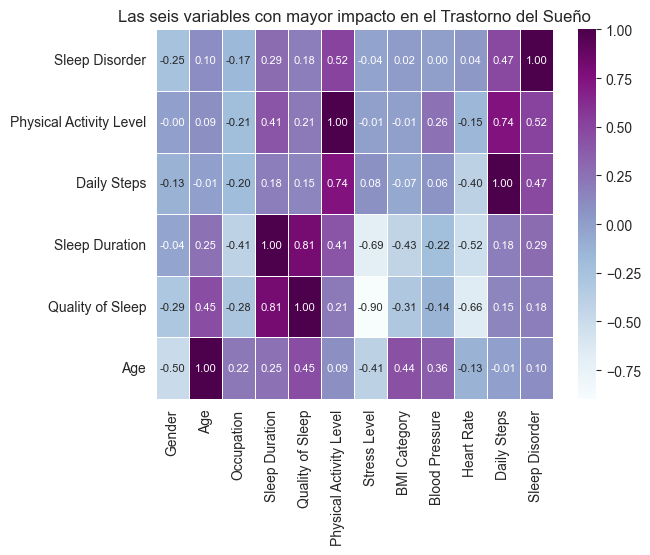

In [18]:
# Crearemos un mapa de calor para visualizar las correlaciones entre las variables del dataset
correlation=dataset_final.corr()
# Significa que estamos buscando las seis variables que tienen la mayor correlacion con la variable 'Sleep Disorder'
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Las seis variables con mayor impacto en el Trastorno del Sueño')
plt.show()

Observamos que los numeros van de -1 a 1
- 1.0 (Morado oscuro): Correlación positiva perfecta. Si una sube, la otra también.
- 0.0: No hay relación lineal.
- -0.5 a -1.0 (Azul claro): Correlación negativa fuerte. Si una sube, la otra baja.

Si bien es cierto que el grafico es util para observar que variables se mueven juntas, para la variable Sleep Disorder debemos interpretarlo como "estas variables son importantes para distinguir entre clases", ya que hemos utilizado LabelEncoder para Sleep Disorder, y los valores de esta (None, Insomnia, Apnea) fueron transformados por el LabelEncoder en 0, 1 y 2 por ejemplo.

Sin embargo para correlaciones lineales se asume que el valor 2 es "mas" que 1, pero tener Apnea no es el doble de no tener nada. Por eso debemos interpretar estos valores de correlacion como importantes para distinguir las diversas categorias, pero no es que influyan en tener una enfermedad en especial como la Apnea o no.

# Division de datos

In [19]:
# Nuestra variable objetivo es 'Sleep Disorder', por lo que separamos las variables independientes (X) y la variable dependiente (y)
x = dataset_final.iloc[:, :-1].values
y = dataset_final.iloc[:, -1].values
print(x)
print(y)

[[1 0 9 ... 0 2 0]
 [1 0 1 ... 0 1 3]
 [1 0 1 ... 0 1 3]
 ...
 [0 3 5 ... 1 0 2]
 [0 3 5 ... 1 0 2]
 [0 3 5 ... 1 0 2]]
[1 1 1 2 2 0 0 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 2 2 2 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [20]:
# Ahora dividimos los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0)

# Eleccion y entrenamiento de los modelos

In [21]:
# Vamos a definir y entrenar varios modelos de machine learning para predecir los trastornos del sueño
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC())
]

In [22]:
# Tambien vamos a escalar las caracteristicas para mejorar el rendimiento de los modelos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


EVALUANDO: Logistic Regression

 Accuracy en conjunto de prueba: 0.8800

 Reporte de Clasificación detallado:
              precision    recall  f1-score   support

    Insomnia     0.8824    0.7500    0.8108        20
        None     0.9286    0.9512    0.9398        41
 Sleep Apnea     0.7500    0.8571    0.8000        14

    accuracy                         0.8800        75
   macro avg     0.8536    0.8528    0.8502        75
weighted avg     0.8829    0.8800    0.8793        75



/opt/anaconda3/envs/sis_pred/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/anaconda3/envs/sis_pred/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/anaconda3/envs/sis_pred/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/anaconda3/envs/sis_pred/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/opt/anaconda3/envs/sis_pred/lib/python3.10/site-packages/sklearn/linear_model/_linear_los

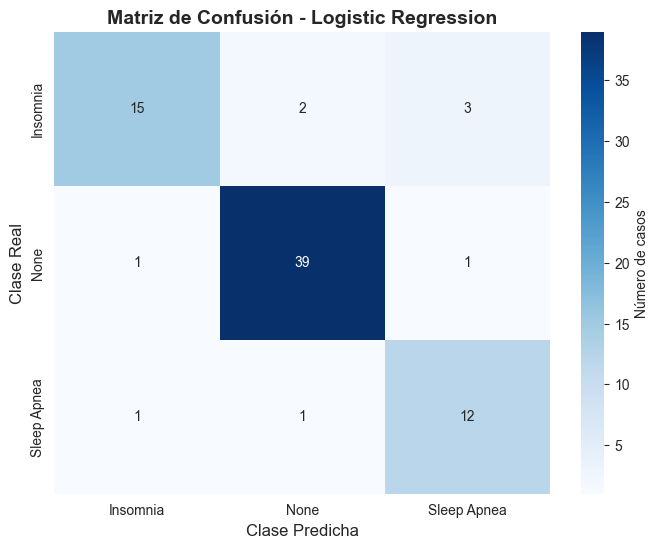


EVALUANDO: Random Forest

 Accuracy en conjunto de prueba: 0.9067

 Reporte de Clasificación detallado:
              precision    recall  f1-score   support

    Insomnia     0.8889    0.8000    0.8421        20
        None     0.9302    0.9756    0.9524        41
 Sleep Apnea     0.8571    0.8571    0.8571        14

    accuracy                         0.9067        75
   macro avg     0.8921    0.8776    0.8839        75
weighted avg     0.9056    0.9067    0.9052        75



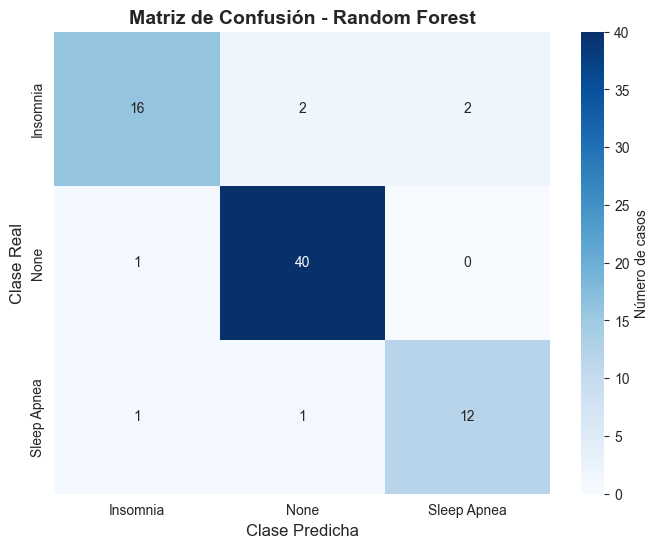


EVALUANDO: Support Vector Machine

 Accuracy en conjunto de prueba: 0.8800

 Reporte de Clasificación detallado:
              precision    recall  f1-score   support

    Insomnia     0.8824    0.7500    0.8108        20
        None     0.9286    0.9512    0.9398        41
 Sleep Apnea     0.7500    0.8571    0.8000        14

    accuracy                         0.8800        75
   macro avg     0.8536    0.8528    0.8502        75
weighted avg     0.8829    0.8800    0.8793        75



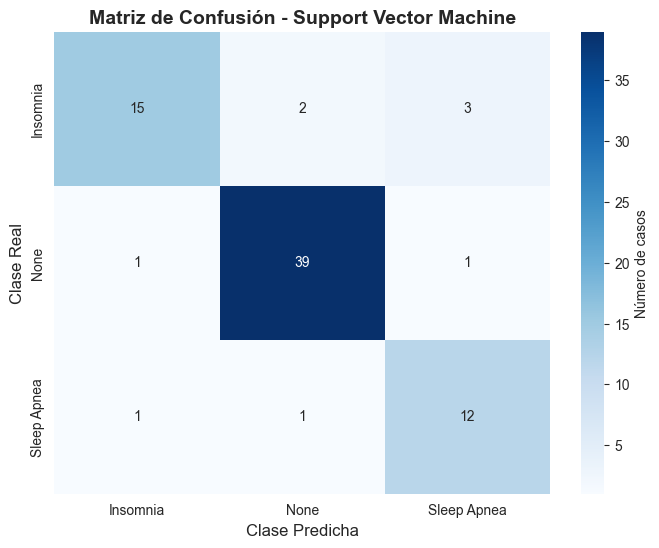

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
# Diccionario para almacenar resultados de todos los modelos
results = {}
for name, model in models:
    print(f"\n{'='*60}")
    print(f"EVALUANDO: {name}")
    print(f"{'='*60}")
    
    # ENTRENAR EL MODELO
    model.fit(x_train_scaled, y_train)
    
    # PREDICCIONES
    y_pred = model.predict(x_test_scaled)
    
    # ACCURACY EN TEST
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"\n Accuracy en conjunto de prueba: {test_accuracy:.4f}")
    
    # REPORTE DE CLASIFICACIÓN (métricas por clase)
    print(f"\n Reporte de Clasificación detallado:")
    print(classification_report(y_test, y_pred, 
                                target_names=['Insomnia', 'None', 'Sleep Apnea'],
                                digits=4))
    
    # Calcular precision, recall, f1 score ponderados
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average='weighted', zero_division=0
    )
    
    # MATRIZ DE CONFUSIÓN
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Insomnia', 'None', 'Sleep Apnea'],
                yticklabels=['Insomnia', 'None', 'Sleep Apnea'],
                cbar_kws={'label': 'Número de casos'})
    plt.title(f'Matriz de Confusión - {name}', fontsize=14, fontweight='bold')
    plt.ylabel('Clase Real', fontsize=12)
    plt.xlabel('Clase Predicha', fontsize=12)
    plt.show()
    
    # GUARDAR RESULTADOS PARA COMPARACIÓN
    results[name] = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'test_accuracy': test_accuracy,
        'model': model
    }

Podemos observar las distintas matrices de confusion para los modelos elegidos:
- En la diagonal se encuentran las predicciones correctas
- Fuera de la diagonal son errores o confusiones entre clases

Métricas clave para comparar modelos:

- Accuracy: % de predicciones correctas
- Precision: de los casos que predijo como X, ¿cuántos realmente eran X?
- Recall: de todos los casos reales de X, ¿cuántos detectó?
- F1-Score: balance entre precision y recall (la métrica más importante generalmente)

In [24]:
# Finalmente haremos una comparacion de los modelos basandonos en la accuracy obtenida en el conjunto de prueba
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1 score': [results[m]['f1_score'] for m in results.keys()],
    'Test Accuracy': [results[m]['test_accuracy'] for m in results.keys()]
})
print(comparison_df)


                   Modelo  Precision    Recall  F1 score  Test Accuracy
0     Logistic Regression   0.882913  0.880000  0.879284       0.880000
1           Random Forest   0.905564  0.906667  0.905196       0.906667
2  Support Vector Machine   0.882913  0.880000  0.879284       0.880000


In [25]:
# Ordenar por mejor rendimiento
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
print(comparison_df.to_string(index=False))

# Identificar el mejor modelo
best_model_name = comparison_df.iloc[0]['Modelo']
best_model = results[best_model_name]['model']

print(f"\n✅ MEJOR MODELO: {best_model_name}")
print(f"   Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")

                Modelo  Precision   Recall  F1 score  Test Accuracy
         Random Forest   0.905564 0.906667  0.905196       0.906667
   Logistic Regression   0.882913 0.880000  0.879284       0.880000
Support Vector Machine   0.882913 0.880000  0.879284       0.880000

✅ MEJOR MODELO: Random Forest
   Test Accuracy: 0.9067


# Consideraciones adicionales
En este caso el mejor modelo es el de Random Forest, sin embargo podemos considerar algunas mejoras futuras a realizar
- El dataset parece estar desbalanceado, teniendo mas casos de None como Sleep Disorder, seria bueno realizar un analisis con otro dataset mas balanceado o tomar medidas para considerar este desbalance.
- Los modelos pueden ser ajustados con otra configuracion de hiperparametros, lo cual no hemos realizado en este proyecto. Existen diversas tecnicas, pero hemos dejado fuera del scope el ajuste de los distintos modelos
- Respecto a las metricas, hemos realizado un promedio de las distintas clases, pero podriamos tener un analisis mas detallado y considerar cada clase de manera individual.
